## Setup

In [1]:
# Packages
import pandas as pd
import torch
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
%matplotlib inline
import pylab
import math

In [2]:
# Import data
tor_df = pd.read_csv("/home/jeremy/github_tornadoesr/data/raw/tor_train_set_no_zeros.csv")


# Quick inspection
tor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8308 entries, 0 to 8307
Data columns (total 35 columns):
DAMAGE_PROPERTY       8308 non-null float64
DURATION_SECONDS      8308 non-null float64
BEGIN_LAT             8308 non-null float64
BEGIN_LON             8308 non-null float64
TOR_LENGTH            8308 non-null float64
TOR_WIDTH             8308 non-null float64
YEAR                  8308 non-null float64
MULTI_VORT_IND        8308 non-null int64
OPEN_WATER_PROP       8308 non-null float64
DEV_OPEN_PROP         8308 non-null float64
DEV_LOW_PROP          8308 non-null float64
DEV_MED_PROP          8308 non-null float64
DEV_HIGH_PROP         8308 non-null float64
BARREN_LAND_PROP      8308 non-null float64
DECID_FOREST_PROP     8308 non-null float64
EVERGR_FOREST_PROP    8308 non-null float64
MIXED_FOREST_PROP     8308 non-null float64
SHRUB_SCRUB_PROP      8308 non-null float64
GRASS_LAND_PROP       8308 non-null float64
PASTURE_HAY_PROP      8308 non-null float64
CULT_CROPS_PROP

In [3]:
# Seperating variables
# The dependent variables
tornado_outcomes = tor_df.iloc[:, [0]]


# Quick inspection
tornado_outcomes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8308 entries, 0 to 8307
Data columns (total 1 columns):
DAMAGE_PROPERTY    8308 non-null float64
dtypes: float64(1)
memory usage: 65.0 KB


In [4]:
# The independent variables
tornado_features = tor_df.iloc[:, 2:34]

tornado_features = tornado_features.drop(["TOR_LENGTH",
                                          "TOR_WIDTH",
                                          "YEAR",
                                          "MULTI_VORT_IND",
                                          "TOR_AREA",
                                          "EXP_INC_AREA",
                                          "DAY_OF_YEAR",
                                          "MONTH"],
                                         axis = 1)


# Quick inspection
tornado_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8308 entries, 0 to 8307
Data columns (total 24 columns):
BEGIN_LAT             8308 non-null float64
BEGIN_LON             8308 non-null float64
OPEN_WATER_PROP       8308 non-null float64
DEV_OPEN_PROP         8308 non-null float64
DEV_LOW_PROP          8308 non-null float64
DEV_MED_PROP          8308 non-null float64
DEV_HIGH_PROP         8308 non-null float64
BARREN_LAND_PROP      8308 non-null float64
DECID_FOREST_PROP     8308 non-null float64
EVERGR_FOREST_PROP    8308 non-null float64
MIXED_FOREST_PROP     8308 non-null float64
SHRUB_SCRUB_PROP      8308 non-null float64
GRASS_LAND_PROP       8308 non-null float64
PASTURE_HAY_PROP      8308 non-null float64
CULT_CROPS_PROP       8308 non-null float64
WOOD_WETLAND_PROP     8308 non-null float64
HERB_WETLAND_PROP     8308 non-null float64
INCOME                8308 non-null float64
MOB_HOME_DENS         8308 non-null float64
POP_DENS              8308 non-null float64
TOT_DEV_INT  

In [5]:
# Make the dependent variables into a numpy array
outcomes_array = tornado_outcomes.values


# Makes the numpy array into a torch Tensor
outcomes_Tensor = torch.from_numpy(outcomes_array)


# Quick inspection
outcomes_Tensor


 0.1532
 0.6540
 0.0873
   ⋮    
 0.5790
 0.1532
 0.2814
[torch.DoubleTensor of size 8308x1]

In [6]:
# Make the independent variables into a numpy array
features_array = tornado_features.values


# Make the numpy array into a torch Tensor
features_Tensor = torch.from_numpy(features_array)


# Quick inspection
features_Tensor


-1.6434e+00 -4.3226e-01  1.0059e+00  ...   2.4012e-01  9.9841e-01 -8.0985e-01
 2.0633e-01  5.5447e-01  2.5095e-01  ...   6.0023e-01  2.2936e-01  5.1571e-01
-3.3130e-01 -8.9907e-01  6.5406e-01  ...  -5.8070e-01 -1.0991e+00 -1.1142e+00
                ...                   ⋱                   ...                
-2.3862e-01  6.3729e-01  2.5982e-01  ...   7.2155e-01  3.0761e-01  1.5969e-01
-1.2487e+00  6.1127e-01  1.0901e-01  ...   9.1690e-01  4.8438e-01  2.6054e-01
-4.7014e-01 -3.4764e-02  1.6123e+00  ...   5.8210e-01 -4.3274e-01 -3.8082e-01
[torch.DoubleTensor of size 8308x24]

### Convert DoubleTensor to FloatTensor

In [7]:
# Changing dependent variables from a DoubleTensor to a FloatTensor
outcomes_Tensor = outcomes_Tensor.float()


# ...and for the independent variables
features_Tensor = features_Tensor.float()


# Quick check
features_Tensor


-1.6434e+00 -4.3226e-01  1.0059e+00  ...   2.4012e-01  9.9841e-01 -8.0985e-01
 2.0633e-01  5.5447e-01  2.5095e-01  ...   6.0023e-01  2.2936e-01  5.1571e-01
-3.3130e-01 -8.9907e-01  6.5406e-01  ...  -5.8070e-01 -1.0991e+00 -1.1142e+00
                ...                   ⋱                   ...                
-2.3862e-01  6.3729e-01  2.5982e-01  ...   7.2155e-01  3.0761e-01  1.5969e-01
-1.2487e+00  6.1127e-01  1.0901e-01  ...   9.1690e-01  4.8438e-01  2.6054e-01
-4.7014e-01 -3.4764e-02  1.6123e+00  ...   5.8210e-01 -4.3274e-01 -3.8082e-01
[torch.FloatTensor of size 8308x24]

## Round 1: One-Hidden-Layer Neural Network

In [8]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [9]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(24, 16),
                            torch.nn.ReLU(),
                            torch.nn.Linear(16, 1))

In [10]:
# Set the loss function
loss_fn = torch.nn.MSELoss(size_average=False)

In [11]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 1e-2


# Define the model's optimizer
optimizer = torch.optim.Adagrad(model.parameters(), lr = learning_rate)


# Train the neural network
for t in range(15000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    optimizer.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using Adagrad
    optimizer.step()

In [12]:
# Get the iterations
iterations = list(range(0, 15000))

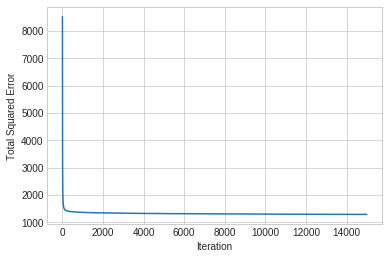

In [13]:
# Plot summed error as a function of iteration
plt.plot(iterations, errors)

plt.xlabel("Iteration")

plt.ylabel("Total Squared Error")

In [14]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8308)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()


# This is for the validation performance plot later
y_pred_array_for_perf = y_pred_resized.data.numpy()*5.407597 + 7.688844

y_pred_list_for_perf = y_pred_array_for_perf.tolist()

In [15]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
outcomes_Variable_resized = outcomes_Variable.resize(8308)


# Make the FloatTensor into a numpy.array
outcomes_array = outcomes_Variable_resized.data.numpy()


# Make the numpy.array into a list
outcomes_list = outcomes_array.tolist()


# This is for the validation performance plot later
outcomes_array_for_perf = outcomes_Variable_resized.data.numpy()*5.407597 + 7.688844

outcomes_list_for_perf = outcomes_array_for_perf.tolist()

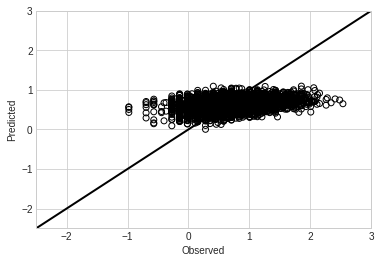

In [16]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list, facecolors = "none", edgecolors = "k")

axes = plt.gca()

axes.set_xlim([-2.5, 3])

axes.set_ylim([-2.5, 3])

plt.plot([-2.5, 3], [-2.5, 3], 'k-', lw = 2)

plt.xlabel("Observed")

plt.ylabel("Predicted")

### Round 1.1: Validation Set Performance

In [17]:
# Import data
valid_df = pd.read_csv("/home/jeremy/github_tornadoesr/data/raw/tor_cv_set_no_zeros.csv")


# Validation set outcomes
valid_outcomes = valid_df.iloc[:, [0]]


# Make the validation outcomes into a numpy array
valid_outcomes_array = valid_outcomes.values


# Makes the numpy array into a torch Tensor
valid_outcomes_Tensor = torch.from_numpy(valid_outcomes_array)


# Changing validation outcomes from a DoubleTensor to a FloatTensor
valid_outcomes_Tensor = valid_outcomes_Tensor.float()


# Make the Tensor into a Pytorch Variable
valid_outcomes_Variable = Variable(valid_outcomes_Tensor)


# Quick check
valid_outcomes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2808 entries, 0 to 2807
Data columns (total 1 columns):
DAMAGE_PROPERTY    2808 non-null float64
dtypes: float64(1)
memory usage: 22.0 KB


In [18]:
# Validation set predictors
valid_predictors = valid_df.iloc[:, 2:34]

valid_predictors = valid_predictors.drop(["TOR_LENGTH",
                                          "TOR_WIDTH",
                                          "YEAR",
                                          "MULTI_VORT_IND",
                                          "TOR_AREA",
                                          "EXP_INC_AREA",
                                          "DAY_OF_YEAR",
                                          "MONTH"],
                                         axis = 1)


# Make the validation predictors into a numpy array
valid_predictors_array = valid_predictors.values


# Makes the numpy array into a torch Tensor
valid_predictors_Tensor = torch.from_numpy(valid_predictors_array)


# Changing validation predictors from a DoubleTensor to a FloatTensor
valid_predictors_Tensor = valid_predictors_Tensor.float()


# Make the Tensor into a Pytorch Variable
valid_predictors_Variable = Variable(valid_predictors_Tensor)


# Quick check
valid_predictors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2808 entries, 0 to 2807
Data columns (total 24 columns):
BEGIN_LAT             2808 non-null float64
BEGIN_LON             2808 non-null float64
OPEN_WATER_PROP       2808 non-null float64
DEV_OPEN_PROP         2808 non-null float64
DEV_LOW_PROP          2808 non-null float64
DEV_MED_PROP          2808 non-null float64
DEV_HIGH_PROP         2808 non-null float64
BARREN_LAND_PROP      2808 non-null float64
DECID_FOREST_PROP     2808 non-null float64
EVERGR_FOREST_PROP    2808 non-null float64
MIXED_FOREST_PROP     2808 non-null float64
SHRUB_SCRUB_PROP      2808 non-null float64
GRASS_LAND_PROP       2808 non-null float64
PASTURE_HAY_PROP      2808 non-null float64
CULT_CROPS_PROP       2808 non-null float64
WOOD_WETLAND_PROP     2808 non-null float64
HERB_WETLAND_PROP     2808 non-null float64
INCOME                2808 non-null float64
MOB_HOME_DENS         2808 non-null float64
POP_DENS              2808 non-null float64
TOT_DEV_INT  

In [19]:
# Get the validation set predictions
y_valid_pred = model(valid_predictors_Variable)


# Get the loss - (total) residual sum of squares
total_SE = loss_fn(y_valid_pred, valid_outcomes_Variable)


# Average that to get mean square error
mean_SE = total_SE / len(y_valid_pred)

mean_SE

Variable containing:
 0.1672
[torch.FloatTensor of size 1]

In [20]:
# Computing the total sum of squares
# Get a torch Variable of the mean outcome
# Compute mean value
valid_outcomes_mean = (sum(valid_outcomes_Variable) / len(valid_outcomes_Variable))
valid_outcomes_mean = valid_outcomes_mean.data.numpy()[0]

# Make that into a ndarray
valid_outcomes_mean = np.repeat(valid_outcomes_mean, len(valid_outcomes_Variable))

# Turn the array into a torch Tensor
valid_outcomes_mean = torch.from_numpy(valid_outcomes_mean)

# Turn that Tensor into a Variable
valid_outcomes_mean_Variable = Variable(valid_outcomes_mean)

# Compute the TSS
tot_sum_squares = loss_fn(valid_outcomes_mean_Variable, valid_outcomes_Variable)


# Grab the residual sum of squares
resid_sum_squares = loss_fn(y_valid_pred, valid_outcomes_Variable)


# Compute R squared
R_squared = 1 - (resid_sum_squares / tot_sum_squares)

R_squared

Variable containing:
1.00000e-02 *
  1.2416
[torch.FloatTensor of size 1]

In [21]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2808)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Convert back to log scale
y_valid_pred_array = y_valid_pred_array*5.407597 + 7.688844


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

In [22]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
valid_outcomes_Variable_resized = valid_outcomes_Variable.resize(2808)


# Make the FloatTensor into a numpy.array
valid_outcomes_array = valid_outcomes_Variable_resized.data.numpy()


# Convert back to log scale
valid_outcomes_array = valid_outcomes_array*5.407597 + 7.688844


# Make the numpy.array into a list
valid_outcomes_list = valid_outcomes_array.tolist()

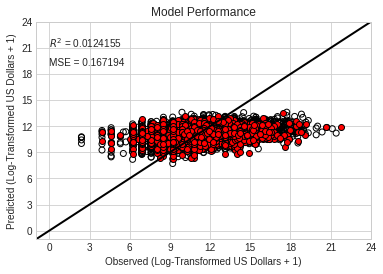

In [23]:
# Plot new predictions versus new data outcomes
plt.scatter(outcomes_list_for_perf, y_pred_list_for_perf, facecolors = "none",
            edgecolors = "k")

plt.scatter(valid_outcomes_list, y_valid_pred_list, facecolors = "r",
            edgecolors = "k")

axes = plt.gca()

axes.set_xlim([-1, 24])

axes.set_ylim([-1, 24])

axes.set_xticks([0, 3, 6, 9, 12, 15, 18, 21, 24])

axes.set_yticks([0, 3, 6, 9, 12, 15, 18, 21, 24])

plt.plot([-1, 24], [-1, 24], 'k-', lw = 2)

axes.set_xlabel("Observed (Log-Transformed US Dollars + 1)")

axes.set_ylabel("Predicted (Log-Transformed US Dollars + 1)")

axes.set_title("Model Performance")

plt.text(0, 21, r"$R^2$ = %s"%(R_squared.data.numpy()[0]))

plt.text(0, 19, "MSE = %s"%(mean_SE.data.numpy()[0]))

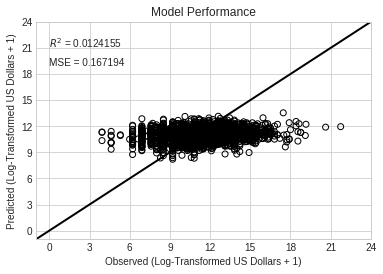

In [24]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list, facecolors = "none",
            edgecolors = "k")

axes = plt.gca()

axes.set_xlim([-1, 24])

axes.set_ylim([-1, 24])

axes.set_xticks([0, 3, 6, 9, 12, 15, 18, 21, 24])

axes.set_yticks([0, 3, 6, 9, 12, 15, 18, 21, 24])

plt.plot([-1, 24], [-1, 24], 'k-', lw = 2)

axes.set_xlabel("Observed (Log-Transformed US Dollars + 1)")

axes.set_ylabel("Predicted (Log-Transformed US Dollars + 1)")

axes.set_title("Model Performance")

plt.text(0, 21, r"$R^2$ = %s"%(R_squared.data.numpy()[0]))

plt.text(0, 19, "MSE = %s"%(mean_SE.data.numpy()[0]))

In [25]:
model[(0)].weight

Parameter containing:

Columns 0 to 9 
 0.1007 -0.0623  0.1507  0.0368  0.1134 -0.2342  0.1145 -0.0877 -0.1178 -0.0140
 0.1639  0.1373 -0.1776 -0.0530 -0.1961  0.0992 -0.0818  0.1932  0.3045  0.3411
 0.0713  0.2084  0.0148  0.0493 -0.2326 -0.0023 -0.0704  0.1785  0.1139 -0.0329
-0.0194 -0.0995 -0.0531 -0.0571  0.0913 -0.2376  0.1129 -0.1064  0.1734 -0.1049
-0.1418 -0.3613 -0.1389  0.1590 -0.0807 -0.2135 -0.1820  0.2032  0.0909  0.0608
 0.0110  0.0148  0.1735  0.2714 -0.0752  0.6891 -0.1284 -0.0404  0.0792  0.3410
 0.4785  0.3097  0.0798  0.2116  0.0990  0.1352  0.0274  0.2058 -0.0737  0.0600
 0.0528  0.0139  0.2195 -0.0913  0.1308 -0.0848 -0.1296  0.1523  0.0959  0.0445
-0.3036  0.2154 -0.1041  0.0491  0.0166 -0.2526 -0.0727  0.0634  0.1743 -0.0418
 0.1452 -0.4296  0.1702 -0.1120  0.5113  0.1631  0.2576 -0.1901 -0.2380 -0.5183
 0.1354 -0.0509  0.0755 -0.2151  0.5796 -0.2953  0.3348 -0.0866 -0.0033 -0.0932
 0.5977  0.1173 -0.0287 -0.0550 -0.0347 -0.0264  0.0098  0.2392  0.1868  0.2737
-

## Round 2: Two-Hidden-Layer Neural Network

In [26]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [27]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(24, 16),
                            torch.nn.ReLU(),
                            torch.nn.Linear(16, 11),
                            torch.nn.ReLU(),
                            torch.nn.Linear(11, 1))

In [28]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 1e-2


# Define the model's optimizer
optimizer = torch.optim.Adagrad(model.parameters(), lr = learning_rate)


# Train the neural network
for t in range(15000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    optimizer.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using Adagrad
    optimizer.step()

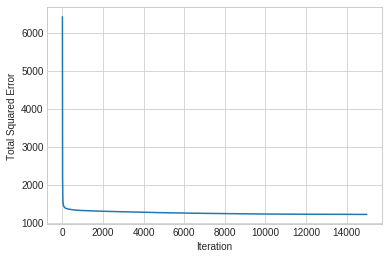

In [29]:
# Plot summed error as a function of iteration
plt.plot(iterations, errors)

plt.xlabel("Iteration")

plt.ylabel("Total Squared Error")

In [30]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8308)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()


# This is for the validation performance plot later
y_pred_array_for_perf = y_pred_resized.data.numpy()*5.407597 + 7.688844

y_pred_list_for_perf = y_pred_array_for_perf.tolist()

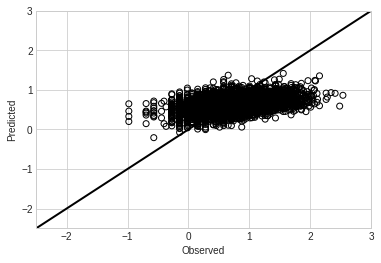

In [31]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list, facecolors = "none", edgecolors = "k")

axes = plt.gca()

axes.set_xlim([-2.5, 3])

axes.set_ylim([-2.5, 3])

plt.plot([-2.5, 3], [-2.5, 3], 'k-', lw = 2)

plt.xlabel("Observed")

plt.ylabel("Predicted")

### Round 2.1: Validation Set Performance

In [32]:
# Get the validation set predictions
y_valid_pred = model(valid_predictors_Variable)


# Get the loss - (total) residual sum of squares
total_SE = loss_fn(y_valid_pred, valid_outcomes_Variable)


# Average that to get mean square error
mean_SE = total_SE / len(y_valid_pred)

mean_SE

Variable containing:
 0.1728
[torch.FloatTensor of size 1]

In [33]:
# Grab the residual sum of squares
resid_sum_squares = loss_fn(y_valid_pred, valid_outcomes_Variable)


# Compute R squared
R_squared = 1 - (resid_sum_squares / tot_sum_squares)

R_squared

Variable containing:
1.00000e-02 *
 -2.0543
[torch.FloatTensor of size 1]

In [34]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2808)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Convert back to log scale
y_valid_pred_array = y_valid_pred_array*5.407597 + 7.688844


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

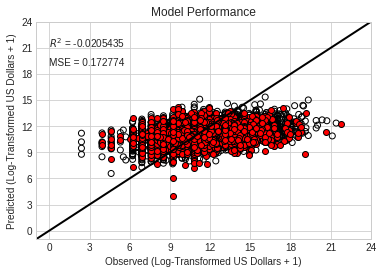

In [35]:
# Plot new predictions versus new data outcomes
plt.scatter(outcomes_list_for_perf, y_pred_list_for_perf, facecolors = "none",
            edgecolors = "k")

plt.scatter(valid_outcomes_list, y_valid_pred_list, facecolors = "r",
            edgecolors = "k")

axes = plt.gca()

axes.set_xlim([-1, 24])

axes.set_ylim([-1, 24])

axes.set_xticks([0, 3, 6, 9, 12, 15, 18, 21, 24])

axes.set_yticks([0, 3, 6, 9, 12, 15, 18, 21, 24])

plt.plot([-1, 24], [-1, 24], 'k-', lw = 2)

axes.set_xlabel("Observed (Log-Transformed US Dollars + 1)")

axes.set_ylabel("Predicted (Log-Transformed US Dollars + 1)")

axes.set_title("Model Performance")

plt.text(0, 21, r"$R^2$ = %s"%(R_squared.data.numpy()[0]))

plt.text(0, 19, "MSE = %s"%(mean_SE.data.numpy()[0]))

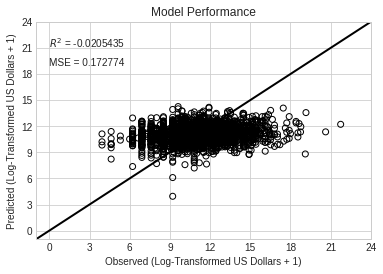

In [36]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list, facecolors = "none",
            edgecolors = "k")

axes = plt.gca()

axes.set_xlim([-1, 24])

axes.set_ylim([-1, 24])

axes.set_xticks([0, 3, 6, 9, 12, 15, 18, 21, 24])

axes.set_yticks([0, 3, 6, 9, 12, 15, 18, 21, 24])

plt.plot([-1, 24], [-1, 24], 'k-', lw = 2)

axes.set_xlabel("Observed (Log-Transformed US Dollars + 1)")

axes.set_ylabel("Predicted (Log-Transformed US Dollars + 1)")

axes.set_title("Model Performance")

plt.text(0, 21, r"$R^2$ = %s"%(R_squared.data.numpy()[0]))

plt.text(0, 19, "MSE = %s"%(mean_SE.data.numpy()[0]))

In [37]:
model[(0)].weight

Parameter containing:

Columns 0 to 9 
 0.2763 -0.3594  0.2135  0.0131 -0.0613  0.0684  0.0492  0.0687  0.1940  0.1941
 0.1393  0.3853  0.0538  0.1615 -0.1439  0.2845 -0.1243  0.0681 -0.2268  0.1686
 0.1306 -0.2293  0.0471 -0.1110  0.2247  0.2205 -0.1180  0.1216  0.2691 -0.2017
 0.1476  0.0799 -0.2445 -0.0888  0.2200 -0.0854  0.0177 -0.2150 -0.1007 -0.1254
 0.0325 -0.0285 -0.0438 -0.0970 -0.0364 -0.0351 -0.3047 -0.0769 -0.0380 -0.0556
 0.1196 -0.0459 -0.2404  0.0216  0.0809  0.2686  0.4329 -0.2610 -0.0127 -0.4239
 0.0506  0.2500 -0.1017  0.1648  0.0511  0.3096 -0.1402 -0.0622  0.0700  0.3400
-0.0489  0.0954  0.1674 -0.1819 -0.1173  0.3235 -0.2933  0.2040 -0.0709  0.1731
-0.1558  0.0284  0.1471 -0.1027 -0.0642  0.1830 -0.2456  0.1581  0.2526 -0.2854
 0.0538 -0.0106  0.0411  0.0160  0.0546 -0.0262  0.1904 -0.0494 -0.1401 -0.3238
 0.2046  0.2773 -0.0759  0.1215 -0.1706  0.2083 -0.0621  0.0756  0.0097 -0.0172
 0.3131  0.0220 -0.0091  0.1778 -0.6063  0.3825  0.0090 -0.0398 -0.2429  0.1077
-

## Round 3: Three-Hidden-Layer Neural Network

In [38]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [39]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(24, 16),
                            torch.nn.ReLU(),
                            torch.nn.Linear(16, 11),
                            torch.nn.ReLU(),
                            torch.nn.Linear(11, 7),
                            torch.nn.ReLU(),
                            torch.nn.Linear(7, 1))

In [40]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 1e-2


# Define the model's optimizer
optimizer = torch.optim.Adagrad(model.parameters(), lr = learning_rate)


# Train the neural network
for t in range(15000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    optimizer.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using Adagrad
    optimizer.step()

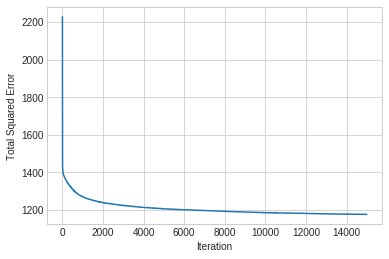

In [41]:
# Plot summed error as a function of iteration
plt.plot(iterations, errors)

plt.xlabel("Iteration")

plt.ylabel("Total Squared Error")

In [42]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8308)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()


# This is for the validation performance plot later
y_pred_array_for_perf = y_pred_resized.data.numpy()*5.407597 + 7.688844

y_pred_list_for_perf = y_pred_array_for_perf.tolist()

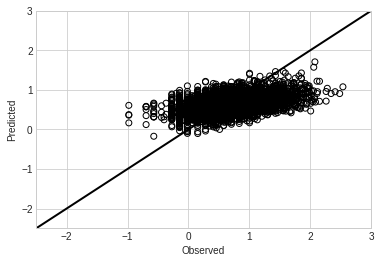

In [43]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list, facecolors = "none", edgecolors = "k")

axes = plt.gca()

axes.set_xlim([-2.5, 3])

axes.set_ylim([-2.5, 3])

plt.plot([-2.5, 3], [-2.5, 3], 'k-', lw = 2)

plt.xlabel("Observed")

plt.ylabel("Predicted")

### Round 3.1: Validation Set Performance

In [44]:
# Get the validation set predictions
y_valid_pred = model(valid_predictors_Variable)


# Get the loss - (total) residual sum of squares
total_SE = loss_fn(y_valid_pred, valid_outcomes_Variable)


# Average that to get mean square error
mean_SE = total_SE / len(y_valid_pred)

mean_SE

Variable containing:
 0.1747
[torch.FloatTensor of size 1]

In [45]:
# Grab the residual sum of squares
resid_sum_squares = loss_fn(y_valid_pred, valid_outcomes_Variable)


# Compute R squared
R_squared = 1 - (resid_sum_squares / tot_sum_squares)

R_squared

Variable containing:
1.00000e-02 *
 -3.2189
[torch.FloatTensor of size 1]

In [46]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2808)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Convert back to log scale
y_valid_pred_array = y_valid_pred_array*5.407597 + 7.688844


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

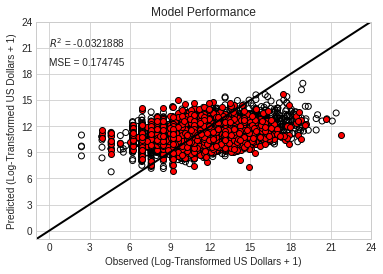

In [47]:
# Plot new predictions versus new data outcomes
plt.scatter(outcomes_list_for_perf, y_pred_list_for_perf, facecolors = "none",
            edgecolors = "k")

plt.scatter(valid_outcomes_list, y_valid_pred_list, facecolors = "r",
            edgecolors = "k")

axes = plt.gca()

axes.set_xlim([-1, 24])

axes.set_ylim([-1, 24])

axes.set_xticks([0, 3, 6, 9, 12, 15, 18, 21, 24])

axes.set_yticks([0, 3, 6, 9, 12, 15, 18, 21, 24])

plt.plot([-1, 24], [-1, 24], 'k-', lw = 2)

axes.set_xlabel("Observed (Log-Transformed US Dollars + 1)")

axes.set_ylabel("Predicted (Log-Transformed US Dollars + 1)")

axes.set_title("Model Performance")

plt.text(0, 21, r"$R^2$ = %s"%(R_squared.data.numpy()[0]))

plt.text(0, 19, "MSE = %s"%(mean_SE.data.numpy()[0]))

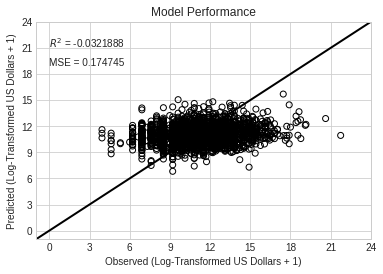

In [48]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list, facecolors = "none",
            edgecolors = "k")

axes = plt.gca()

axes.set_xlim([-1, 24])

axes.set_ylim([-1, 24])

axes.set_xticks([0, 3, 6, 9, 12, 15, 18, 21, 24])

axes.set_yticks([0, 3, 6, 9, 12, 15, 18, 21, 24])

plt.plot([-1, 24], [-1, 24], 'k-', lw = 2)

axes.set_xlabel("Observed (Log-Transformed US Dollars + 1)")

axes.set_ylabel("Predicted (Log-Transformed US Dollars + 1)")

axes.set_title("Model Performance")

plt.text(0, 21, r"$R^2$ = %s"%(R_squared.data.numpy()[0]))

plt.text(0, 19, "MSE = %s"%(mean_SE.data.numpy()[0]))

In [49]:
model[(0)].weight

Parameter containing:

Columns 0 to 9 
-0.1596  0.0060  0.0898 -0.2881 -0.0337  0.0888  0.0425  0.1629  0.3835  0.1565
 0.0160  0.0934  0.0176  0.1176 -0.0816 -0.0842 -0.2176  0.2836  0.3271 -0.1190
 0.0503 -0.1178  0.0336  0.0247 -0.1707 -0.0221 -0.0949 -0.1009  0.3805  0.2677
 0.4472  0.4333 -0.0937  0.2282 -0.1657  0.2146 -0.3256  0.1748  0.3949 -0.0812
 0.1804 -0.0112  0.2421 -0.0546  0.2804  0.3125 -0.1341 -0.3131  0.2936  0.0793
 0.1314 -0.4067 -0.0502 -0.0852  0.0880 -0.2301  0.0976 -0.4181  0.4216 -0.3333
 0.2818  0.5048  0.0841 -0.3693 -0.2463 -0.0410 -0.0591  0.1757  0.1174  0.1468
-0.0699 -0.7463 -0.1257  0.1969  0.3356  0.1378  0.0182 -0.2440  0.0341 -0.0223
 0.0078  0.2154  0.1888  0.0905 -0.4670  0.1300  0.0730  0.0083  0.3043  0.1555
-0.2563  0.1957 -0.0209  0.0873 -0.1358  0.2916 -0.2598  0.2503  0.1228 -0.2148
-0.0157  0.2047 -0.0382 -0.1880  0.2584 -0.0182 -0.0586  0.1797 -0.0282 -0.0227
-0.1009 -0.3827  0.2882 -0.0858  0.1575 -0.0751 -0.1503 -0.2681  0.0620  0.0983
 

## Round 4: Four-Hidden-Layer Neural Network

In [50]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [51]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(24, 16),
                            torch.nn.ReLU(),
                            torch.nn.Linear(16, 11),
                            torch.nn.ReLU(),
                            torch.nn.Linear(11, 7),
                            torch.nn.ReLU(),
                            torch.nn.Linear(7, 5),
                            torch.nn.ReLU(),
                            torch.nn.Linear(5, 1))

In [52]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 1e-2


# Define the model's optimizer
optimizer = torch.optim.Adagrad(model.parameters(), lr = learning_rate)


# Train the neural network
for t in range(15000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    optimizer.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using Adagrad
    optimizer.step()

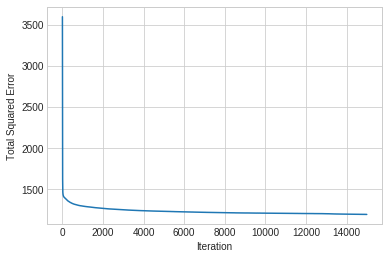

In [53]:
# Plot summed error as a function of iteration
plt.plot(iterations, errors)

plt.xlabel("Iteration")

plt.ylabel("Total Squared Error")

In [54]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8308)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()


# This is for the validation performance plot later
y_pred_array_for_perf = y_pred_resized.data.numpy()*5.407597 + 7.688844

y_pred_list_for_perf = y_pred_array_for_perf.tolist()

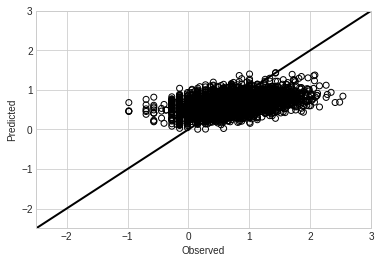

In [55]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list, facecolors = "none", edgecolors = "k")

axes = plt.gca()

axes.set_xlim([-2.5, 3])

axes.set_ylim([-2.5, 3])

plt.plot([-2.5, 3], [-2.5, 3], 'k-', lw = 2)

plt.xlabel("Observed")

plt.ylabel("Predicted")

### Round 4.1: Validation Set Performance

In [56]:
# Get the validation set predictions
y_valid_pred = model(valid_predictors_Variable)


# Get the loss - (total) residual sum of squares
total_SE = loss_fn(y_valid_pred, valid_outcomes_Variable)


# Average that to get mean square error
mean_SE = total_SE / len(y_valid_pred)

mean_SE

Variable containing:
 0.1803
[torch.FloatTensor of size 1]

In [57]:
# Grab the residual sum of squares
resid_sum_squares = loss_fn(y_valid_pred, valid_outcomes_Variable)


# Compute R squared
R_squared = 1 - (resid_sum_squares / tot_sum_squares)

R_squared

Variable containing:
1.00000e-02 *
 -6.5040
[torch.FloatTensor of size 1]

In [58]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2808)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Convert back to log scale
y_valid_pred_array = y_valid_pred_array*5.407597 + 7.688844


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

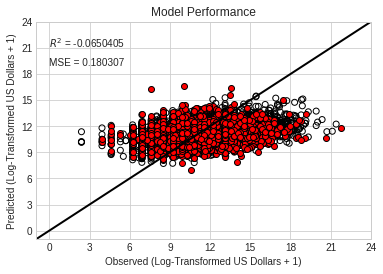

In [59]:
# Plot new predictions versus new data outcomes
plt.scatter(outcomes_list_for_perf, y_pred_list_for_perf, facecolors = "none",
            edgecolors = "k")

plt.scatter(valid_outcomes_list, y_valid_pred_list, facecolors = "r",
            edgecolors = "k")

axes = plt.gca()

axes.set_xlim([-1, 24])

axes.set_ylim([-1, 24])

axes.set_xticks([0, 3, 6, 9, 12, 15, 18, 21, 24])

axes.set_yticks([0, 3, 6, 9, 12, 15, 18, 21, 24])

plt.plot([-1, 24], [-1, 24], 'k-', lw = 2)

axes.set_xlabel("Observed (Log-Transformed US Dollars + 1)")

axes.set_ylabel("Predicted (Log-Transformed US Dollars + 1)")

axes.set_title("Model Performance")

plt.text(0, 21, r"$R^2$ = %s"%(R_squared.data.numpy()[0]))

plt.text(0, 19, "MSE = %s"%(mean_SE.data.numpy()[0]))

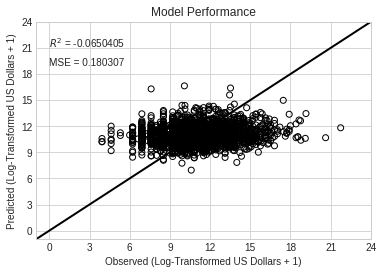

In [60]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list, facecolors = "none",
            edgecolors = "k")

axes = plt.gca()

axes.set_xlim([-1, 24])

axes.set_ylim([-1, 24])

axes.set_xticks([0, 3, 6, 9, 12, 15, 18, 21, 24])

axes.set_yticks([0, 3, 6, 9, 12, 15, 18, 21, 24])

plt.plot([-1, 24], [-1, 24], 'k-', lw = 2)

axes.set_xlabel("Observed (Log-Transformed US Dollars + 1)")

axes.set_ylabel("Predicted (Log-Transformed US Dollars + 1)")

axes.set_title("Model Performance")

plt.text(0, 21, r"$R^2$ = %s"%(R_squared.data.numpy()[0]))

plt.text(0, 19, "MSE = %s"%(mean_SE.data.numpy()[0]))

In [61]:
model[(0)].weight

Parameter containing:

Columns 0 to 9 
-0.3100  0.0129  0.2381 -0.2691  0.2177  0.1187 -0.0205 -0.2243  0.2334 -0.0457
 0.1643  0.5519 -0.0721  0.6652  0.2033  0.0776 -0.0840  0.1378  0.5235 -0.2588
-0.1425 -0.3383  0.1702 -0.5094  0.1668 -0.3638  0.0886 -0.1941  0.4449  0.2920
-0.2929  0.3408  0.1610  0.2468  0.1910  0.4673 -0.0585  0.2854  0.1621  0.0139
 0.3061 -0.4358 -0.1321  0.0381  0.2702 -0.2221 -0.3222 -0.0692  0.2253  0.0899
-0.0057 -0.1768 -0.0146  0.1080 -0.0031 -0.0596  0.1688  0.2799  0.0148  0.0758
 0.1032 -0.1474  0.0448  0.1468  0.0324  0.2900 -0.0737  0.1183 -0.2175  0.4162
 0.1614 -0.0745  0.0545  0.0513  0.1488 -0.0880  0.1402  0.0579  0.4519 -0.0984
 0.0752 -0.0980 -0.1305  0.0519 -0.2518 -0.3108  0.0189 -0.0707 -0.0842 -0.0764
-0.1359 -0.7593 -0.1405  0.1394  0.2979 -0.1235 -0.0584 -0.0773 -0.4165 -0.4073
-0.0510 -0.1113  0.1193 -0.0760  0.0010 -0.1825  0.0454  0.0423 -0.2727  0.0666
-0.1273  0.1855 -0.0806  0.1781  0.2130 -0.0138  0.1441  0.2392  0.2309  0.0313
 

## Round 5: Five-Hidden-Layer Neural Network

In [62]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [63]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(24, 16),
                            torch.nn.ReLU(),
                            torch.nn.Linear(16, 11),
                            torch.nn.ReLU(),
                            torch.nn.Linear(11, 7),
                            torch.nn.ReLU(),
                            torch.nn.Linear(7, 5),
                            torch.nn.ReLU(),
                            torch.nn.Linear(5, 3),
                            torch.nn.ReLU(),
                            torch.nn.Linear(3, 1))

In [64]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 1e-2


# Define the model's optimizer
optimizer = torch.optim.Adagrad(model.parameters(), lr = learning_rate)


# Train the neural network
for t in range(15000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    optimizer.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using Adagrad
    optimizer.step()

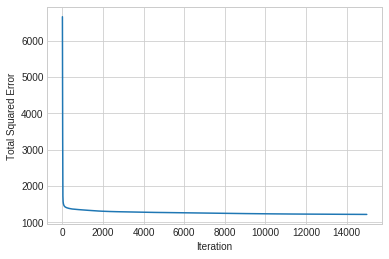

In [65]:
# Plot summed error as a function of iteration
plt.plot(iterations, errors)

plt.xlabel("Iteration")

plt.ylabel("Total Squared Error")

In [66]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8308)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()


# This is for the validation performance plot later
y_pred_array_for_perf = y_pred_resized.data.numpy()*5.407597 + 7.688844

y_pred_list_for_perf = y_pred_array_for_perf.tolist()

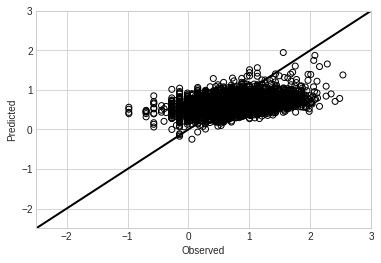

In [67]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list, facecolors = "none", edgecolors = "k")

axes = plt.gca()

axes.set_xlim([-2.5, 3])

axes.set_ylim([-2.5, 3])

plt.plot([-2.5, 3], [-2.5, 3], 'k-', lw = 2)

plt.xlabel("Observed")

plt.ylabel("Predicted")

### Round 5.1: Validation Set Performance

In [68]:
# Get the validation set predictions
y_valid_pred = model(valid_predictors_Variable)


# Get the loss - (total) residual sum of squares
total_SE = loss_fn(y_valid_pred, valid_outcomes_Variable)


# Average that to get mean square error
mean_SE = total_SE / len(y_valid_pred)

mean_SE

Variable containing:
 0.1767
[torch.FloatTensor of size 1]

In [69]:
# Grab the residual sum of squares
resid_sum_squares = loss_fn(y_valid_pred, valid_outcomes_Variable)


# Compute R squared
R_squared = 1 - (resid_sum_squares / tot_sum_squares)

R_squared

Variable containing:
1.00000e-02 *
 -4.3691
[torch.FloatTensor of size 1]

In [70]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2808)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Convert back to log scale
y_valid_pred_array = y_valid_pred_array*5.407597 + 7.688844


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

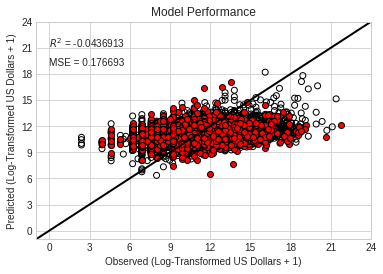

In [71]:
# Plot new predictions versus new data outcomes
plt.scatter(outcomes_list_for_perf, y_pred_list_for_perf, facecolors = "none",
            edgecolors = "k")

plt.scatter(valid_outcomes_list, y_valid_pred_list, facecolors = "r",
            edgecolors = "k")

axes = plt.gca()

axes.set_xlim([-1, 24])

axes.set_ylim([-1, 24])

axes.set_xticks([0, 3, 6, 9, 12, 15, 18, 21, 24])

axes.set_yticks([0, 3, 6, 9, 12, 15, 18, 21, 24])

plt.plot([-1, 24], [-1, 24], 'k-', lw = 2)

axes.set_xlabel("Observed (Log-Transformed US Dollars + 1)")

axes.set_ylabel("Predicted (Log-Transformed US Dollars + 1)")

axes.set_title("Model Performance")

plt.text(0, 21, r"$R^2$ = %s"%(R_squared.data.numpy()[0]))

plt.text(0, 19, "MSE = %s"%(mean_SE.data.numpy()[0]))

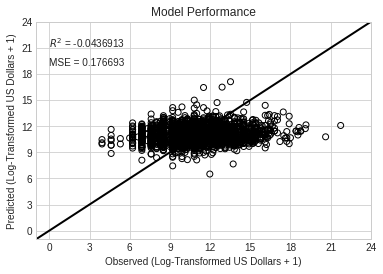

In [72]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list, facecolors = "none",
            edgecolors = "k")

axes = plt.gca()

axes.set_xlim([-1, 24])

axes.set_ylim([-1, 24])

axes.set_xticks([0, 3, 6, 9, 12, 15, 18, 21, 24])

axes.set_yticks([0, 3, 6, 9, 12, 15, 18, 21, 24])

plt.plot([-1, 24], [-1, 24], 'k-', lw = 2)

axes.set_xlabel("Observed (Log-Transformed US Dollars + 1)")

axes.set_ylabel("Predicted (Log-Transformed US Dollars + 1)")

axes.set_title("Model Performance")

plt.text(0, 21, r"$R^2$ = %s"%(R_squared.data.numpy()[0]))

plt.text(0, 19, "MSE = %s"%(mean_SE.data.numpy()[0]))

In [73]:
model[(0)].weight

Parameter containing:

Columns 0 to 9 
 0.1710 -0.4123  0.3850  0.1915  0.2217  0.3482 -0.0414  0.2439  0.1226 -0.3571
 0.0295  0.1853 -0.1181  0.0906 -0.1099  0.3181 -0.0945  0.0837  0.0277  0.2795
 0.0526 -0.1579  0.0431 -0.2378 -0.4255  0.0895  0.2821 -0.1243 -0.4227  0.1702
 0.1871 -0.0395  0.3875 -0.0398  0.3504 -0.0560 -0.0940 -0.0428  0.3590  0.2669
-0.1674  0.1890  0.0636 -0.3694  0.0533  0.1131  0.0494  0.0778  0.0951 -0.0313
 0.3179 -0.0545  0.1809  0.3520 -0.5376  0.2872 -0.3552  0.0106 -0.5720 -0.5587
-0.1421 -0.1413 -0.0961  0.0932  0.0149  0.0782  0.2210 -0.1925  0.0166 -0.1996
-0.1226 -0.3963  0.0493  0.1226  0.3135  0.4062  0.0636 -0.0091  0.1211 -0.0453
-0.0137 -0.3500 -0.0779  0.3612  0.2660 -0.5140  0.1399 -0.1178  0.0738 -0.0604
-0.1142  0.1935 -0.0216  0.0591  0.0175  0.0061  0.0140 -0.0891  0.0964  0.2905
-0.2280 -0.2725 -0.1829  0.0157  0.0816  0.1938  0.3849 -0.5030  0.0052  0.5471
-0.2403  0.0555 -0.0413  0.1248 -0.1239 -0.0591  0.1325 -0.0450 -0.2025  0.0337
 

## Round 6: Six-Hidden-Layer Neural Network

In [74]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [75]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(24, 16),
                            torch.nn.ReLU(),
                            torch.nn.Linear(16, 11),
                            torch.nn.ReLU(),
                            torch.nn.Linear(11, 7),
                            torch.nn.ReLU(),
                            torch.nn.Linear(7, 5),
                            torch.nn.ReLU(),
                            torch.nn.Linear(5, 3),
                            torch.nn.ReLU(),
                            torch.nn.Linear(3, 2),
                            torch.nn.ReLU(),
                            torch.nn.Linear(2, 1))

In [76]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 1e-2


# Define the model's optimizer
optimizer = torch.optim.Adagrad(model.parameters(), lr = learning_rate)


# Train the neural network
for t in range(15000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    optimizer.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using Adagrad
    optimizer.step()

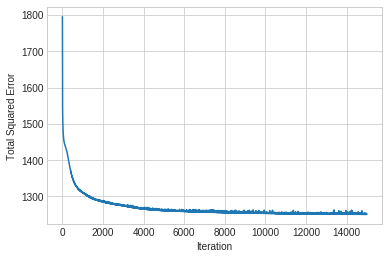

In [77]:
# Plot summed error as a function of iteration
plt.plot(iterations, errors)

plt.xlabel("Iteration")

plt.ylabel("Total Squared Error")

In [78]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8308)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()


# This is for the validation performance plot later
y_pred_array_for_perf = y_pred_resized.data.numpy()*5.407597 + 7.688844

y_pred_list_for_perf = y_pred_array_for_perf.tolist()

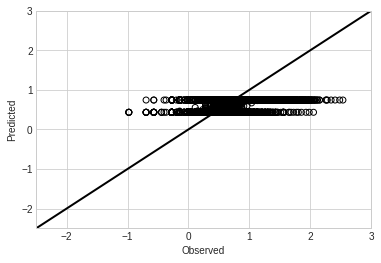

In [79]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list, facecolors = "none", edgecolors = "k")

axes = plt.gca()

axes.set_xlim([-2.5, 3])

axes.set_ylim([-2.5, 3])

plt.plot([-2.5, 3], [-2.5, 3], 'k-', lw = 2)

plt.xlabel("Observed")

plt.ylabel("Predicted")

### Round 6.1: Validation Set Performance

In [80]:
# Get the validation set predictions
y_valid_pred = model(valid_predictors_Variable)


# Get the loss - (total) residual sum of squares
total_SE = loss_fn(y_valid_pred, valid_outcomes_Variable)


# Average that to get mean square error
mean_SE = total_SE / len(y_valid_pred)

mean_SE

Variable containing:
 0.1734
[torch.FloatTensor of size 1]

In [81]:
# Grab the residual sum of squares
resid_sum_squares = loss_fn(y_valid_pred, valid_outcomes_Variable)


# Compute R squared
R_squared = 1 - (resid_sum_squares / tot_sum_squares)

R_squared

Variable containing:
1.00000e-02 *
 -2.4170
[torch.FloatTensor of size 1]

In [82]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2808)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Convert back to log scale
y_valid_pred_array = y_valid_pred_array*5.407597 + 7.688844


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

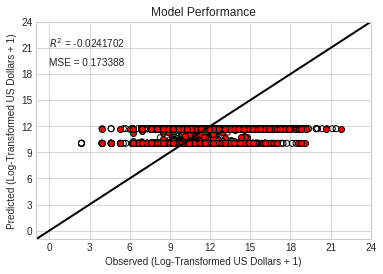

In [83]:
# Plot new predictions versus new data outcomes
plt.scatter(outcomes_list_for_perf, y_pred_list_for_perf, facecolors = "none",
            edgecolors = "k")

plt.scatter(valid_outcomes_list, y_valid_pred_list, facecolors = "r",
            edgecolors = "k")

axes = plt.gca()

axes.set_xlim([-1, 24])

axes.set_ylim([-1, 24])

axes.set_xticks([0, 3, 6, 9, 12, 15, 18, 21, 24])

axes.set_yticks([0, 3, 6, 9, 12, 15, 18, 21, 24])

plt.plot([-1, 24], [-1, 24], 'k-', lw = 2)

axes.set_xlabel("Observed (Log-Transformed US Dollars + 1)")

axes.set_ylabel("Predicted (Log-Transformed US Dollars + 1)")

axes.set_title("Model Performance")

plt.text(0, 21, r"$R^2$ = %s"%(R_squared.data.numpy()[0]))

plt.text(0, 19, "MSE = %s"%(mean_SE.data.numpy()[0]))

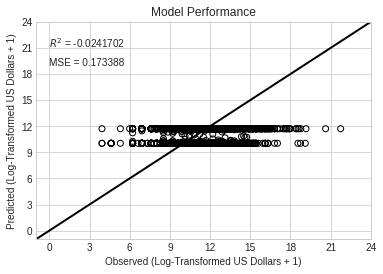

In [84]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list, facecolors = "none",
            edgecolors = "k")

axes = plt.gca()

axes.set_xlim([-1, 24])

axes.set_ylim([-1, 24])

axes.set_xticks([0, 3, 6, 9, 12, 15, 18, 21, 24])

axes.set_yticks([0, 3, 6, 9, 12, 15, 18, 21, 24])

plt.plot([-1, 24], [-1, 24], 'k-', lw = 2)

axes.set_xlabel("Observed (Log-Transformed US Dollars + 1)")

axes.set_ylabel("Predicted (Log-Transformed US Dollars + 1)")

axes.set_title("Model Performance")

plt.text(0, 21, r"$R^2$ = %s"%(R_squared.data.numpy()[0]))

plt.text(0, 19, "MSE = %s"%(mean_SE.data.numpy()[0]))

In [85]:
model[(0)].weight

Parameter containing:

Columns 0 to 9 
 0.1046  0.2583  0.2269 -0.1816 -0.2484 -0.1726  0.0854  0.2131  0.2095  0.1086
-0.0238 -0.4638 -0.0021 -0.1534 -0.3185  0.2027 -0.0203 -0.1408  0.0706  0.0642
 0.0472 -0.1607  0.0571 -0.1166  0.2352 -0.1552  0.1817  0.1945 -0.0111 -0.1579
 0.2180  0.2149 -0.1589 -0.2259  0.2515 -0.0222 -0.1709  0.1166  0.0618 -0.0277
 0.1691  0.1821 -0.3150  0.0326 -0.1554  0.1705  0.1981  0.0981  0.3060 -0.0025
-0.0927  0.1578  0.2934  0.1388  0.0929 -0.0473 -0.3193  0.3857  0.0718  0.1107
 0.0705  0.1606 -0.0811  0.3977 -0.0508 -0.0456  0.3161 -0.0228  0.1572 -0.4124
 0.0924 -0.1280 -0.0639  0.1522  0.2836  0.3126  0.1960 -0.0803  0.0367  0.3818
 0.0611  0.1147 -0.1382 -0.0204 -0.1506  0.0488  0.1834  0.3912  0.1867 -0.0324
 0.2894  0.1182  0.1651 -0.0113 -0.2327  0.2731  0.2049 -0.1456  0.0522 -0.1006
-0.3235 -0.1120 -0.1084  0.1288 -0.0289  0.0311  0.0341  0.3877  0.2620  0.3170
-0.3652  0.0326  0.0587 -0.3047  0.1160  0.1813  0.0331  0.3176 -0.3267  0.0292
-

## Round 7: Linear Regression

In [86]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [87]:
# Make the neural network - really a regression
model = torch.nn.Sequential(torch.nn.Linear(24, 1))

In [88]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 1e-2


# Define the model's optimizer
optimizer = torch.optim.Adagrad(model.parameters(), lr = learning_rate)


# Train the neural network
for t in range(15000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    optimizer.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using Adagrad
    optimizer.step()

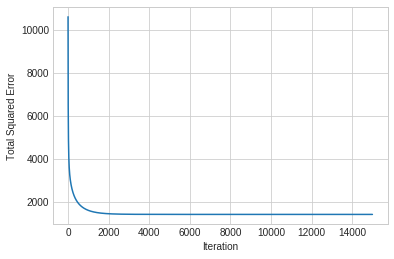

In [89]:
# Plot summed error as a function of iteration
plt.plot(iterations, errors)

plt.xlabel("Iteration")

plt.ylabel("Total Squared Error")

In [90]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8308)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()


# This is for the validation performance plot later
y_pred_array_for_perf = y_pred_resized.data.numpy()*5.407597 + 7.688844

y_pred_list_for_perf = y_pred_array_for_perf.tolist()

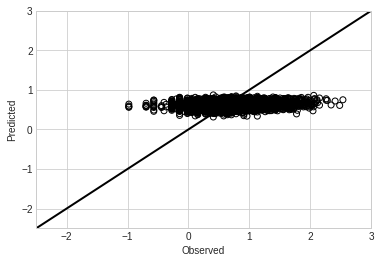

In [91]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list, facecolors = "none", edgecolors = "k")

axes = plt.gca()

axes.set_xlim([-2.5, 3])

axes.set_ylim([-2.5, 3])

plt.plot([-2.5, 3], [-2.5, 3], 'k-', lw = 2)

plt.xlabel("Observed")

plt.ylabel("Predicted")

### Round 7.1: Validation Set Performance

In [92]:
# Get the validation set predictions
y_valid_pred = model(valid_predictors_Variable)


# Get the loss - (total) residual sum of squares
total_SE = loss_fn(y_valid_pred, valid_outcomes_Variable)


# Average that to get mean square error
mean_SE = total_SE / len(y_valid_pred)

mean_SE

Variable containing:
 0.1655
[torch.FloatTensor of size 1]

In [93]:
# Grab the residual sum of squares
resid_sum_squares = loss_fn(y_valid_pred, valid_outcomes_Variable)


# Compute R squared
R_squared = 1 - (resid_sum_squares / tot_sum_squares)

R_squared

Variable containing:
1.00000e-02 *
  2.2673
[torch.FloatTensor of size 1]

In [94]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2808)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Convert back to log scale
y_valid_pred_array = y_valid_pred_array*5.407597 + 7.688844


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

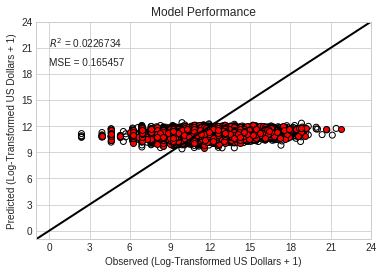

In [95]:
# Plot new predictions versus new data outcomes
plt.scatter(outcomes_list_for_perf, y_pred_list_for_perf, facecolors = "none",
            edgecolors = "k")

plt.scatter(valid_outcomes_list, y_valid_pred_list, facecolors = "r",
            edgecolors = "k")

axes = plt.gca()

axes.set_xlim([-1, 24])

axes.set_ylim([-1, 24])

axes.set_xticks([0, 3, 6, 9, 12, 15, 18, 21, 24])

axes.set_yticks([0, 3, 6, 9, 12, 15, 18, 21, 24])

plt.plot([-1, 24], [-1, 24], 'k-', lw = 2)

axes.set_xlabel("Observed (Log-Transformed US Dollars + 1)")

axes.set_ylabel("Predicted (Log-Transformed US Dollars + 1)")

axes.set_title("Model Performance")

plt.text(0, 21, r"$R^2$ = %s"%(R_squared.data.numpy()[0]))

plt.text(0, 19, "MSE = %s"%(mean_SE.data.numpy()[0]))

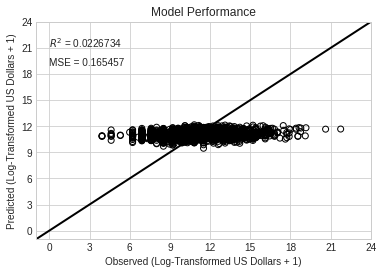

In [96]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list, facecolors = "none",
            edgecolors = "k")

axes = plt.gca()

axes.set_xlim([-1, 24])

axes.set_ylim([-1, 24])

axes.set_xticks([0, 3, 6, 9, 12, 15, 18, 21, 24])

axes.set_yticks([0, 3, 6, 9, 12, 15, 18, 21, 24])

plt.plot([-1, 24], [-1, 24], 'k-', lw = 2)

axes.set_xlabel("Observed (Log-Transformed US Dollars + 1)")

axes.set_ylabel("Predicted (Log-Transformed US Dollars + 1)")

axes.set_title("Model Performance")

plt.text(0, 21, r"$R^2$ = %s"%(R_squared.data.numpy()[0]))

plt.text(0, 19, "MSE = %s"%(mean_SE.data.numpy()[0]))

In [97]:
model[(0)].weight

Parameter containing:

Columns 0 to 9 
1.00000e-02 *
  3.0319  0.2430 -0.1329 -1.2170  1.7556 -2.1359  0.1689  0.2482  3.9651  1.2936

Columns 10 to 19 
1.00000e-02 *
 -0.0575 -1.3766  1.2905 -2.0607  0.6510  0.6022  0.6255 -0.6685  3.1522  0.4361

Columns 20 to 23 
1.00000e-02 *
  3.9583 -4.0919  3.2284 -2.0547
[torch.FloatTensor of size 1x24]